In [1]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d


sub_c1 = "../data/sub_c1.csv"
sub_c2 = "../data/sub_c2.csv"
sub_c3 = "../data/sub_c3.csv"
ep1 = "../data/sub_ep1.csv"
ep2 = "../data/sub_ep2.csv"
deb_c1 = "../data/prelev_c1.csv"
deb_c2 = "../data/prelev_c2.csv"
deb_c3 = "../data/prelev_c3.csv"
rch_zones = "../data/rch_zone.csv"
topo = "../data/topo.csv"
perma1 = "../data/perma1.csv"
perma2 = "../data/perma2.csv"
perma3 = "../data/perma3.csv"


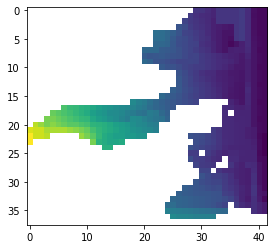

In [2]:
#1st layer
sub_c1 = pd.read_csv(sub_c1,sep=";",header=None,na_values=None)
sub_c1[sub_c1==7777]=None # remove nodata
plt.imshow(sub_c1)

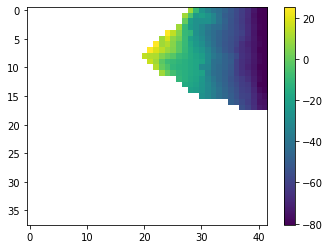

In [3]:
# 2nd layer
botm_c2 = pd.read_csv(sub_c2,sep=";",header=None,na_values=None)
botm_c2[botm_c2==7777]=None # remove nodata

plt.imshow(botm_c2)
plt.colorbar()

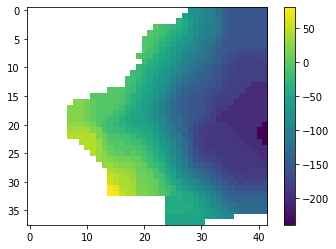

In [4]:
# third layer
botm_c3 = pd.read_csv(sub_c3,sep=";",header=None,na_values=None)
botm_c3[botm_c3==7777]=None
plt.imshow(botm_c3)
plt.colorbar()

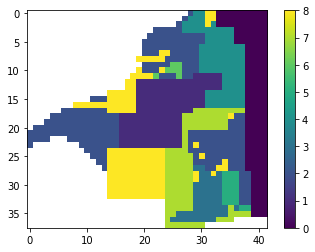

In [5]:
#rch zones
rch = pd.read_csv(rch_zones,sep=";",header=None,na_values=None)
rch[rch==7777]=None
plt.imshow(rch)
plt.colorbar()

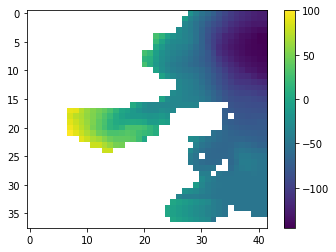

In [6]:
# load the clay layer's botm above the 3rd layer
epo1 = pd.read_csv(ep1,sep=";",header=None,na_values=None)
epo1[epo1==7777]=None # remove nodata
epo1[epo1==9999]=None # remove nodata
plt.imshow(epo1)
plt.colorbar()

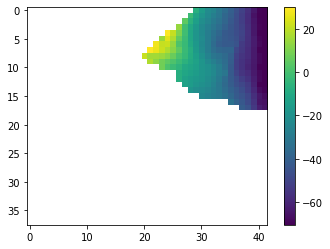

In [7]:
# load the clay layer's botm above the 2nd layer
epo2 = pd.read_csv(ep2,sep=";",header=None,na_values=None)
epo2[epo2==7777]=None # remove nodata
epo2[epo2==9999]=None # remove nodata
plt.imshow(epo2)
plt.colorbar()

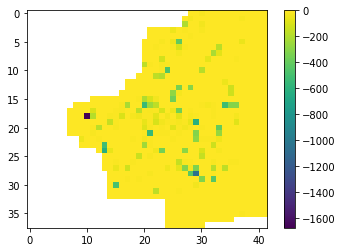

In [8]:
a = pd.read_csv(deb_c3,sep=";",header=None,na_values=None)
a[a==7777]=None # remove nodata
a[a==9999]=None # remove nodata
plt.imshow(a)
plt.colorbar()

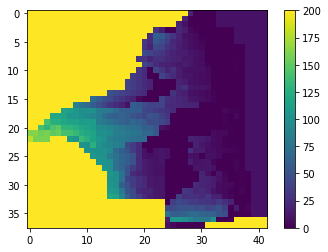

In [9]:
top = pd.read_csv(topo,sep=";",header=None)
#top[top==7777]=None # remove nodata
b=plt.imshow(top)
plt.colorbar(b)
b.set_clim(0,200)

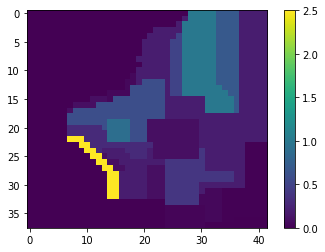

In [10]:
a = pd.read_csv(perma3,sep=";",header=None)
#top[top==7777]=None # remove nodata
b=plt.imshow(a)
plt.colorbar(b)

In [11]:
idomain_1 = np.zeros([38,42])
idomain_2 = np.zeros([38,42])
idomain_3 = np.zeros([38,42])-1
idomain_3[top==7777]= 0
idomain_4 = np.zeros([38,42])
idomain_5 = np.zeros([38,42])

In [12]:
idomain_1[sub_c1.notnull()] = 1
idomain_2[epo2.notnull()] = 1
idomain_3[botm_c2.notnull()] = 1
idomain_4[epo1.notnull()] = 1
idomain_5[botm_c3.notnull()] = 1

In [13]:
bot1 = top.copy()
bot1[pd.DataFrame(idomain_1!=1)] = top[pd.DataFrame(idomain_1!=1)] - 0.1
bot1[pd.DataFrame(idomain_1==1)] = sub_c1[pd.DataFrame(idomain_1==1)]

bot1.iloc[31,33]=top.iloc[31,33]-0.1 # bricolage pour corriger qqch

bot2 = bot1.copy()
bot2[pd.DataFrame(idomain_2!=1)] = bot1[pd.DataFrame(idomain_2!=1)]-0.1
bot2[pd.DataFrame(idomain_2==1)] = epo2[pd.DataFrame(idomain_2==1)]

bot2.iloc[31,33]=bot1.iloc[31,33]-0.1 # bricolage pour corriger qqch

bot3 = bot2.copy()
bot3[pd.DataFrame(idomain_3!=1)] = bot2[pd.DataFrame(idomain_3!=1)]-0.1
bot3[pd.DataFrame(idomain_3==1)] = botm_c2[pd.DataFrame(idomain_3==1)]

bot4 = bot3.copy()
bot4[pd.DataFrame(idomain_4!=1)] = bot3[pd.DataFrame(idomain_4!=1)]-0.1
bot4[pd.DataFrame(idomain_4==1)] = epo1[pd.DataFrame(idomain_4==1)]

bot5 = bot4.copy()
bot5[pd.DataFrame(idomain_5!=1)] = bot4[pd.DataFrame(idomain_5!=1)]-0.1
bot5[pd.DataFrame(idomain_5==1)] = botm_c3[pd.DataFrame(idomain_5==1)]


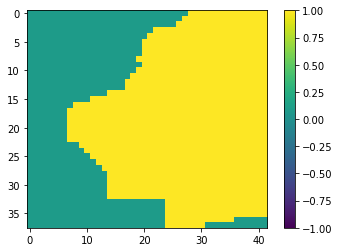

In [14]:
a=plt.imshow(bot4-bot5)
plt.colorbar(a)
a.set_clim(-1,1)

In [15]:
surface = [top,bot1,bot2,bot3,bot4,bot5]

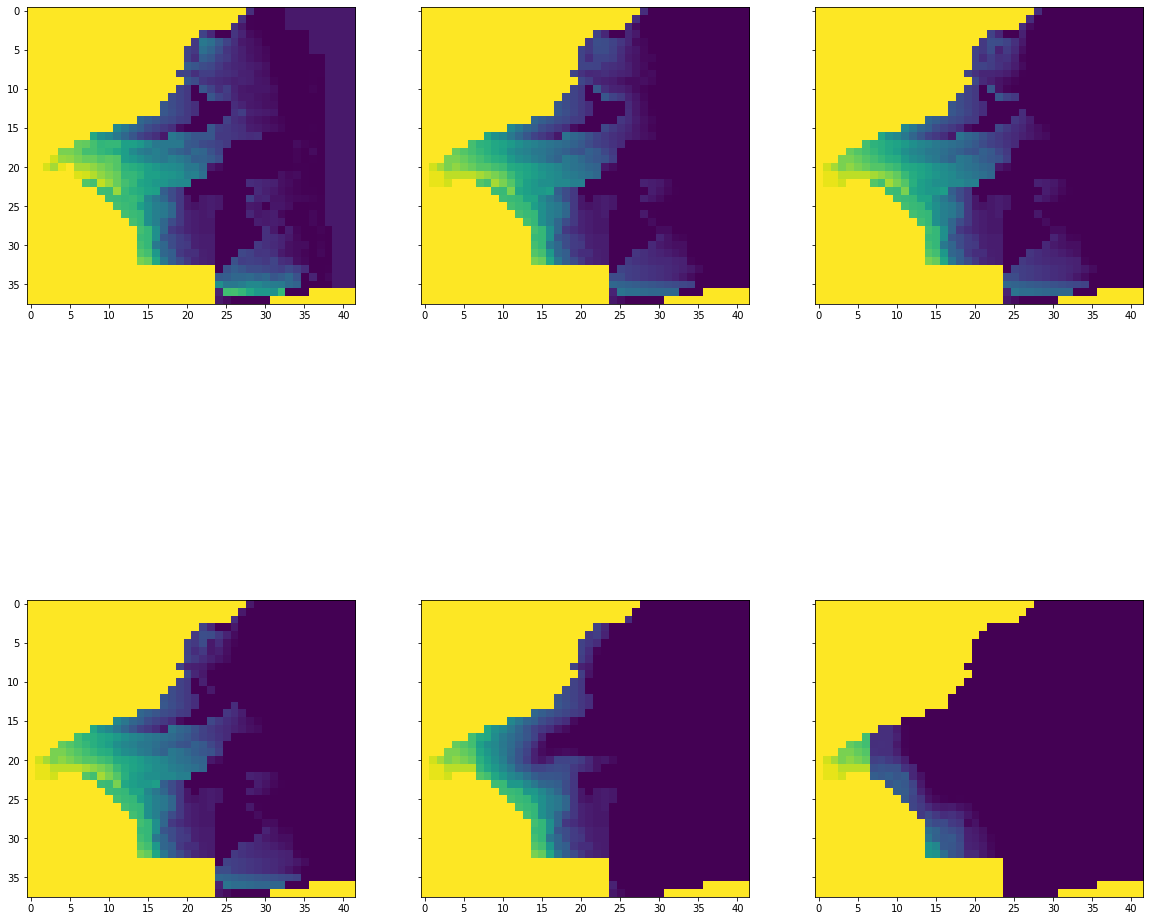

In [16]:
fig,ax = plt.subplots(2,3,sharey=True,figsize=(20,20))
i=0;l=0
for s in surface:
    b=ax[l,i].imshow(s)
    b.set_clim(0,150)
    i +=1
    if i == 3:
        i=0
        l+=1

In [17]:
ep_epo1=(top-bot1)

In [18]:
ep_epo1[np.array(ep_epo1<=0)]

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41


In [19]:
x=np.arange(42)
y=np.arange(38)
X,Y=np.meshgrid(x,y)

In [46]:
top[top>1000]=None
bot1[bot1>1000]=None
bot2[bot2>1000]=None
bot3[bot3>1000]=None
bot4[bot4>1000]=None


C:\Users\schorppl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\schorppl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  after removing the cwd from sys.path.


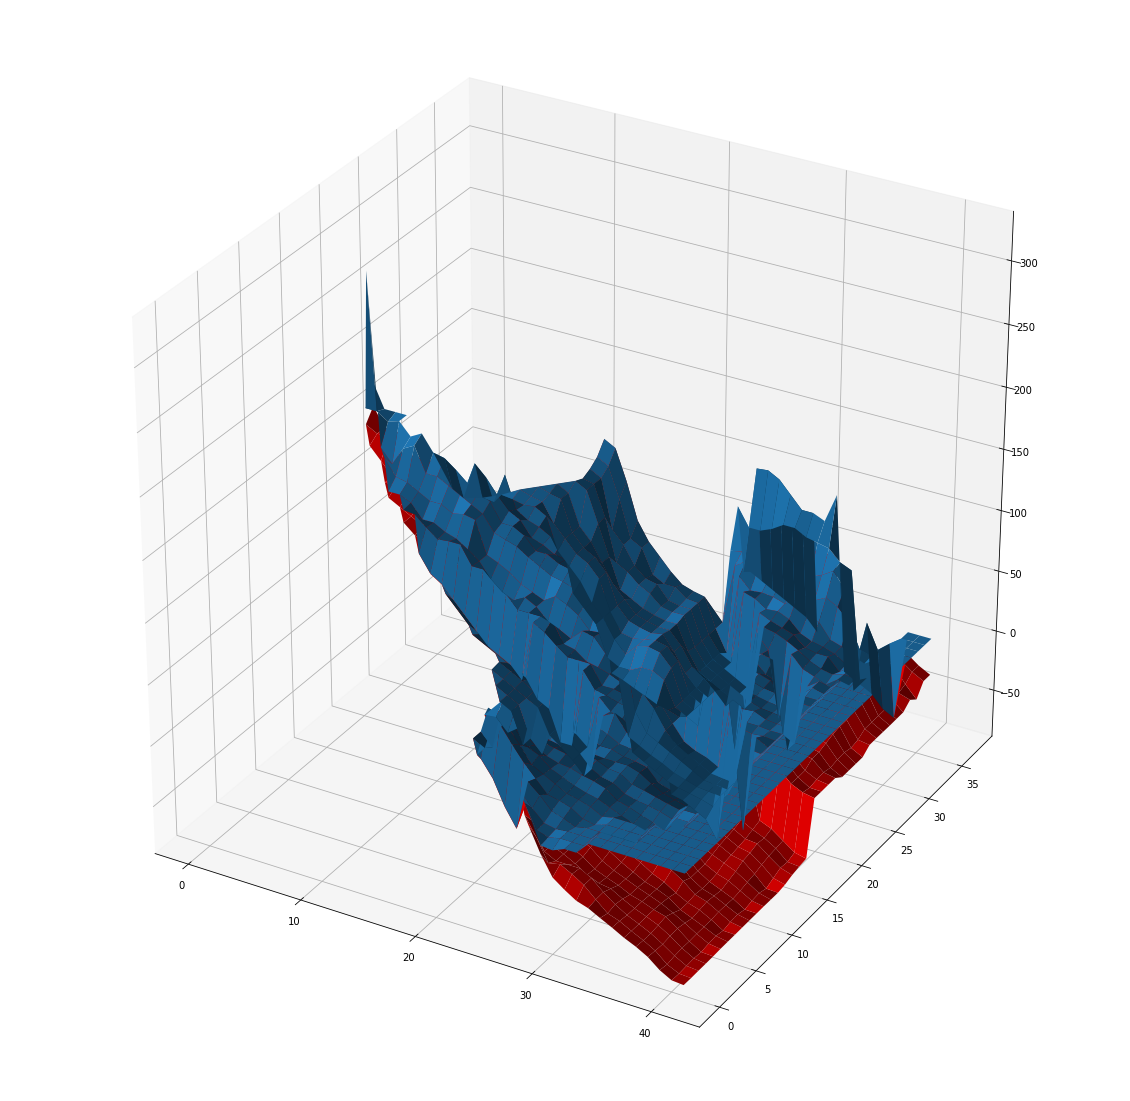

In [73]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,np.array(bot3),color="r",alpha=1,rstride=1,cstride=1,edgecolor='none')
ax.plot_surface(X,Y,np.array(top),rstride=1,cstride=1)

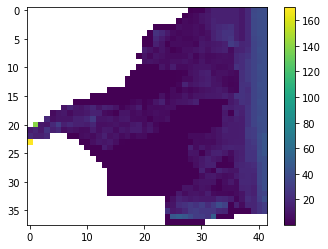

In [22]:
plt.imshow(top-bot1)
plt.colorbar()